In [164]:
from qiskit import QuantumRegister, QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from numpy import pi

In [165]:
# Hadamard Gate
def Hadamard(circuit, quantum_register, num_qubits):
    for i in range(num_qubits-1):
        circuit.h(quantum_register[i])

    circuit.barrier()

In [166]:
# Add CNOT, X, and RY Gates
def addGates(circuit, quantum_register, theta, num_qubits):
    for i in range(num_qubits+1):
        if i == 1 or i == 3:
            circuit.x(quantum_register[1])
        elif i == 2:
            circuit.x(quantum_register[0])
            circuit.x(quantum_register[1])

        circuit.cry(theta, quantum_register[0], quantum_register[2])
        circuit.cx(quantum_register[0], quantum_register[1])
        circuit.cry(-theta, quantum_register[1], quantum_register[2])
        circuit.cx(quantum_register[0], quantum_register[1])
        circuit.cry(theta, quantum_register[1], quantum_register[2])

        if i != 3:
            circuit.barrier()

In [167]:
# Add Measurements
def measurements(circuit, quantum_register, num_qubits):
    for i in range(num_qubits):
        circuit.measure(quantum_register[i])

In [168]:
def createFRQI(theta):
    num_qubits = 3
    quantum_reg = QuantumRegister(num_qubits, 'q')
    circuit = QuantumCircuit(quantum_reg)

    Hadamard(circuit, quantum_reg, num_qubits)

    addGates(circuit, quantum_reg, theta, num_qubits)

    circuit.measure_all()

    return circuit


In [169]:
def runSimulation(circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    transpile_circuit = transpile(circuit, aer_sim)
    quantum_obj = assemble(transpile_circuit, shots=4096)
    result = aer_sim.run(quantum_obj).result()
    counts = result.get_counts(circuit)
    
    return counts

## All pixels are white (minimum intensity)
### $\theta = 0$

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


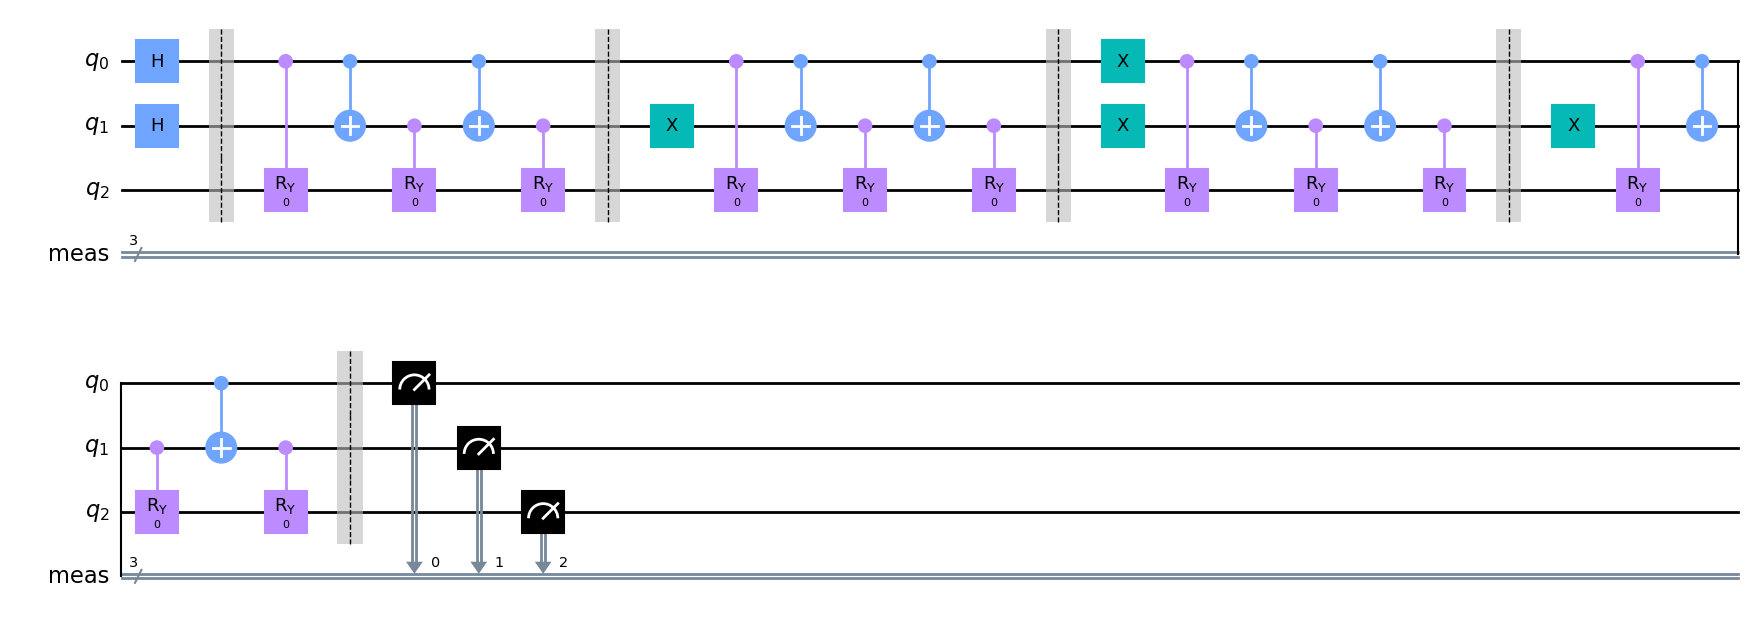

In [170]:
# Main block
circuit = createFRQI(theta=0)
circuit.draw(output="mpl")

/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_7542/1565479154.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(quantum_obj).result()


{'001': 1029, '000': 969, '010': 1044, '011': 1054}


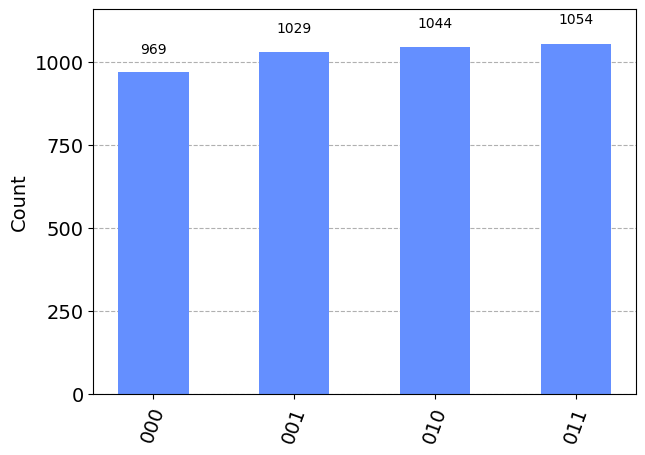

In [171]:
# Run simulation
counts = runSimulation(circuit)
print(counts)
plot_histogram(counts)

## All pixels are black (maximum intensity)
### $\theta = \frac{\pi}{2}$

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


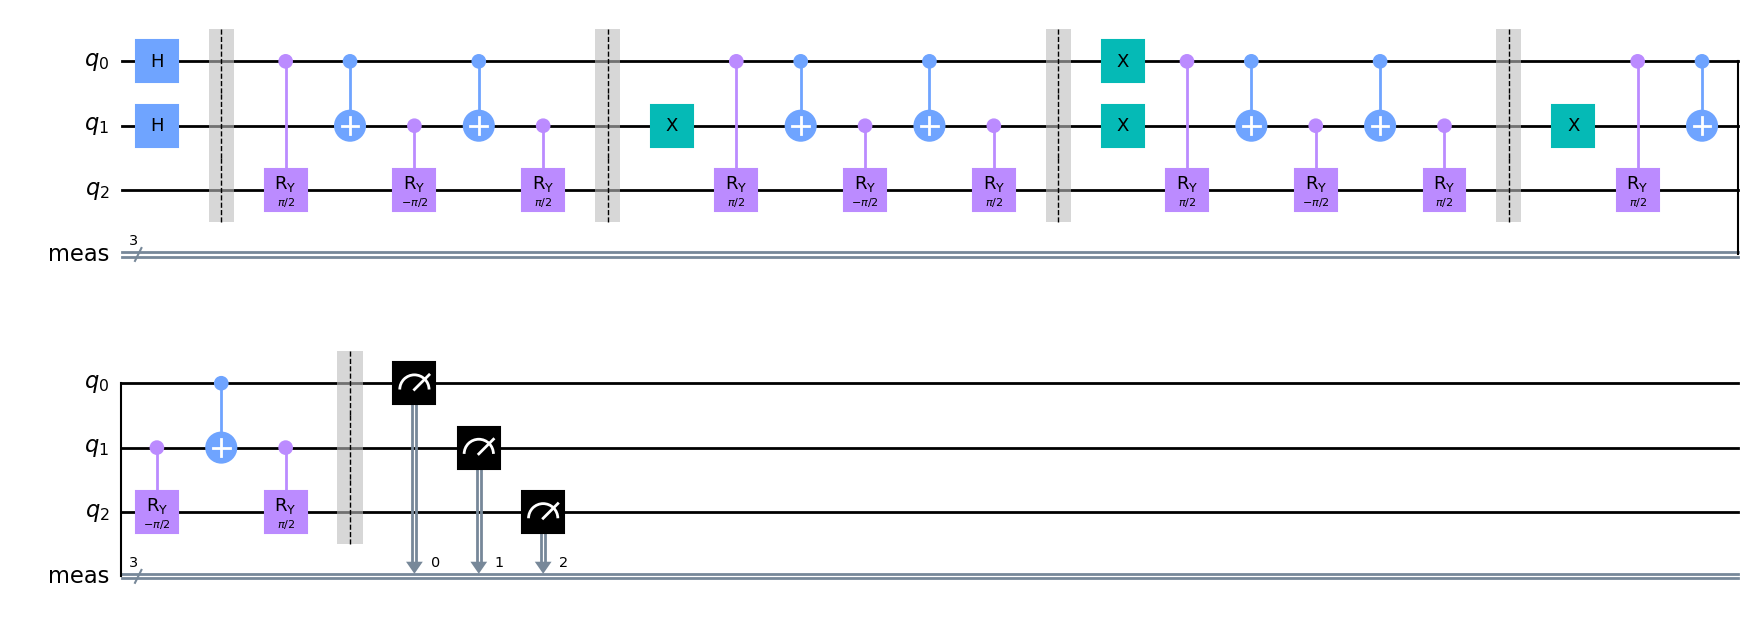

In [172]:
# Main block
circuit = createFRQI(theta=pi/2)
circuit.draw(output="mpl")

/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_7542/1565479154.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(quantum_obj).result()


{'100': 1023, '101': 1001, '110': 1028, '111': 1044}


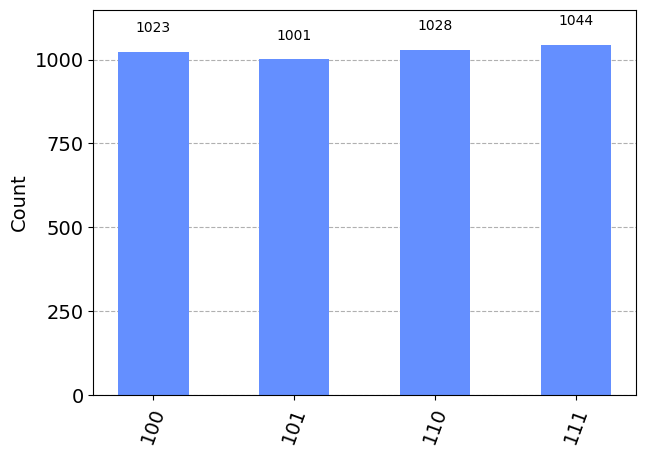

In [173]:
# Run simulation
counts = runSimulation(circuit)
print(counts)
plot_histogram(counts)

## All pixels are at 50% intensity
### $\theta = \frac{\pi}{4}$

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


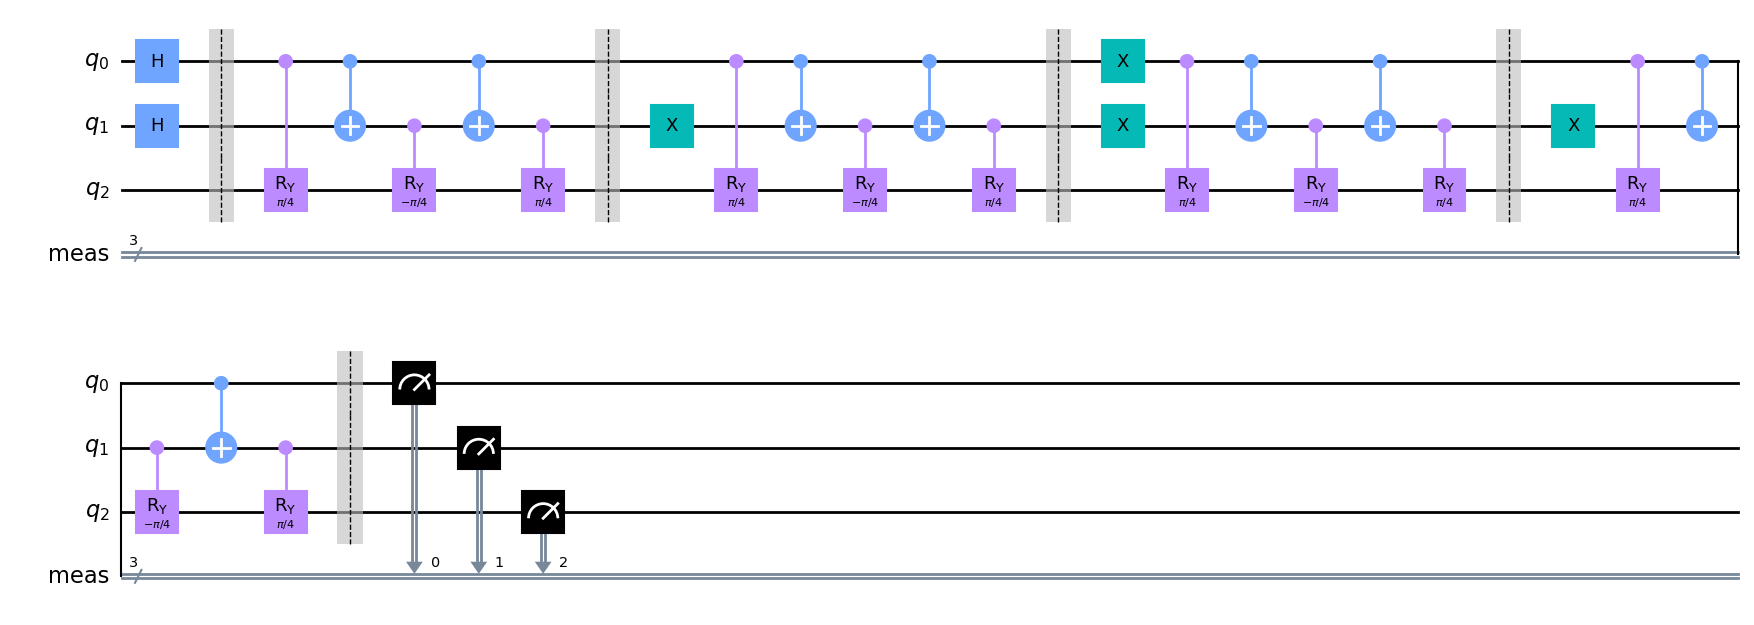

In [174]:
# Main block
circuit = createFRQI(theta=pi/4)
circuit.draw(output="mpl")

/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_7542/1565479154.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(quantum_obj).result()


{'101': 524, '100': 543, '001': 525, '110': 503, '010': 476, '000': 491, '011': 526, '111': 508}


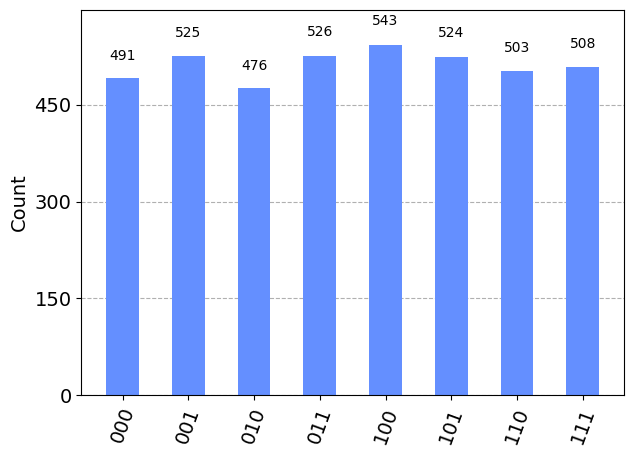

In [175]:
# Run simulation
counts = runSimulation(circuit)
print(counts)
plot_histogram(counts)